## 张量

### 张量是一个数据容器，在pytorch中是我们用到的各式各样的数据，并提供了GPU计算和自动求导等多种功能

In [2]:
import torch

# 不改变原值 和 改变原值函数 + _
y = torch.rand(4, 3)
x = torch.tensor([1, 1, 1]).T
print(torch.add(x, y))
y.add_(x) # y的值改变为 x+y的值
print(y) 

tensor([[1.7251, 1.8868, 1.8700],
        [1.5331, 1.5078, 1.3017],
        [1.7214, 1.4276, 1.6914],
        [1.7207, 1.7257, 1.6173]])
tensor([[1.7251, 1.8868, 1.8700],
        [1.5331, 1.5078, 1.3017],
        [1.7214, 1.4276, 1.6914],
        [1.7207, 1.7257, 1.6173]])


D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3281.)
  """


In [4]:
# 张量的维度变换方法 ，view处理后的数据和原数据共享内存，只是改变了展现方式；
# reshape函数不能确定返回值是否为其拷贝值，推荐用clone函数和view函数替代
x = torch.ones(2, 3)
y = x.view(1, 6)
print("y.add_(1):", y.add_(1))
print("x:", x)

y.add_(1): tensor([[2., 2., 2., 2., 2., 2.]])
x: tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [5]:
# x的值发生了改变，采用clone函数处理，不改变x的值
x = torch.ones(2, 3)
y = torch.clone(x)
print("y.add_(1):", y.add_(1))
print("x:", x)

y.add_(1): tensor([[2., 2., 2.],
        [2., 2., 2.]])
x: tensor([[1., 1., 1.],
        [1., 1., 1.]])


### 广播机制为常用的矩阵运算机制，遵循以下原则：
如果遵守以下规则，则两个tensor是“可广播的”：<br>
  每个tensor至少有一个维度；<br>
  遍历tensor所有维度时，从末尾随开始遍历，两个tensor存在下列情况：<br>
    tensor维度相等。<br>
    tensor维度不等且其中一个维度为1。<br>
    tensor维度不等且其中一个维度不存在。<br>
如果两个tensor是“可广播的”，则计算过程遵循下列规则：<br>
    如果两个tensor的维度不同，则在维度较小的tensor的前面增加维度，使它们维度相等。<br>
    对于每个维度，计算结果的维度值取两个tensor中较大的那个值。<br>
    两个tensor扩展维度的过程是将数值进行复制。<br>

In [19]:
x = torch.ones(2, 3)
y = torch.ones(2)
(x + y).shape #维度不匹配，y = torch.ones(3)则维度匹配了

torch.Size([2, 3])

In [24]:
x = torch.ones(5, 2, 3)
y = torch.ones(2, 3)
#维度不同则在较小维度前加维度，小维度要与较大维度后部分对应，要么值相同要么为1，可广播
print((x + y).shape) # 后部分维度对应
y = torch.ones(2, 1)
print((x + y).shape) # 后部分有一个维度大元素个数为1， 可广播
y = torch.ones(2, 2)
print((x + y).shape) # 后部分y维度对应元素个数与x不对应且维度对应的元素个数不为1，不能广播，

torch.Size([5, 2, 3])
torch.Size([5, 2, 3])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 2

### 总结，如果要能广播，多维张量相加则需要已有的部分维度对应的元素个数相等或者有不等的维度中存在维度个数为1的情况

## 自动求导

### 具体属性
通过对张量的属性。requires_grad设置为True，课计算张量操作后的所有梯度，
并且会自动累加到.grad属性;完成计算后，可以通过调用.backward()来自动计算梯度<br>
使用.detach()方法将张量与其计算历史隔离，防止此张量被跟踪，可以将代码块包装在 with torch.no_grad(): 中<br>
每个张量都有一个.grad_fn属性，该属性引用了创建 Tensor 自身的Function(除非这个张量是用户手动创建的，即这个张量的grad_fn是 None )。

In [130]:
x = torch.ones(2, 2, requires_grad=True) # 默认requires_grad为false,无法求导
y = x ** 2 # 注意y是x运算后的中间结果，不是此运算的源输入，若想求梯度，需要用retarin_grad方法设置
out = (y + x).sum() # 如果backward()不指定参数，梯度运算的输出只能为结果标量才能反向传播

In [131]:
out.backward()

In [132]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [133]:
y.grad

D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  """Entry point for launching an IPython kernel.


In [104]:
x = torch.ones(2, 2, requires_grad=True) # 默认requires_grad为false,无法求导
y = x ** 2 # 想求中间运算结果y梯度，需要用retarin_grad方法设置
y.retain_grad()
out = (y + x).sum() # 梯度运算的出书只能为结果标量

## print(y.grad, y.requires_grad) # 此时中间结果y显示没有梯度，对于实际运算中我们用不到

In [148]:
x = torch.ones(2, 2, requires_grad=True) # 默认requires_grad为false,无法求导
y = torch.eye(2, requires_grad=True)
out1 = (x**2 + y**2).sum() # 梯度运算的出书只能为结果标量

In [149]:
out1.backward()

In [150]:
x.grad, y.grad

(tensor([[2., 2.],
         [2., 2.]]),
 tensor([[2., 0.],
         [0., 2.]]))

In [151]:
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [153]:
# 再来一次反向传播
out1 = (x**2 + y**2).sum() 
out1.backward()

In [154]:
x.grad, y.grad #梯度进行了叠加

(tensor([[4., 4.],
         [4., 4.]]),
 tensor([[4., 0.],
         [0., 4.]]))

In [155]:
# 每一次反向传播之前需要将梯度清零
out1 = (x**2 + y**2).sum() 
x.grad.data.zero_() # 将x梯度清零
out1.backward()

In [156]:
x.grad, y.grad #y没有将梯度数值清零

(tensor([[2., 2.],
         [2., 2.]]),
 tensor([[6., 0.],
         [0., 6.]]))

In [160]:
# 设置不计算梯度代码块
print(x.requires_grad)
with torch.no_grad():
    print(x.requires_grad, (x**2).requires_grad) #x梯度属性不变，计算后的结果不计算梯度属性

True
True False


In [168]:
x = torch.ones(1,requires_grad=True)

print(x.data) # 还是一个tensor
print(x.data.requires_grad) # 但是已经是独立于计算图之外

y = 2 * x
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播

y.backward()
print(x) # 更改data的值也会影响tensor的值 
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


In [172]:
x = torch.ones(2, 2, requires_grad=True)
out = (x ** 2 + x).sum()

x.data *= 100 # 会影响梯度,因为梯度运算过程中需要用到x, 对x求导梯度为 2 * x + 1
out.backward()

x.grad

tensor([[201., 201.],
        [201., 201.]])

In [179]:
x = torch.ones(2, 2, requires_grad=True)
y = x ** 2 + x
out = y

x.data *= 100 # 会影响梯度,因为梯度运算过程中需要用到x, 对x求导梯度为 2 * x + 1
out.backward(y) # 输入y后，y为元素为2的2*2矩阵，d(out) / d(x) 的结果需乘y，变为2*（2*x+1）

x.grad

tensor([[402., 402.],
        [402., 402.]])

## 并行计算简介
并行计算应用场景：数据量较大无法在单块GPU上完成/需要提升计算速度.<br>
cuda:是英伟达GPU的编程语言；pytorch使用CUDA表示要求我们的模型使用GPU<br>
并行方法：<br>1、将模型的不同部分拆分到不同GPU中；<br>2、将同一层的任务分布到不同数据中，让不同GPU训练同一层模型的不同任务 <br>3、将不同数据分布到不同GPU上<br>
**注意处理后的注意数据、模型合并**

# Pytorch的主要组成模块

## 基本配置

In [181]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optimizer

In [184]:
batch_size = 16 # 常用参数，批处理大小，学习率， 最大迭代次数
lr = 1e-4
max_epochs = 100

In [185]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0' #使用GPU设置

In [186]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu") #使用GPU设置

## 数据读入

In [187]:
# Dataset定义好数据的格式和数据变换形式，DataLoader用iterative的方式不断读入批次数据
# 自定义Dataset类实现灵活的数据读取，需要继承pytorch自身的Dataset类，包含三个函数：
# 1.__init__: 用于向类中传入外部参数，同时定义样本集
# 2.__getitem__: 用于逐个读取样本集合中的元素，可以进行一定的变换，并将返回训练/验证所需的数据
# 3.__len__: 用于返回数据集的样本数 

# 迭代式的读取数据：images, labels = next(iter(val_loader))

## 模型构建

In [188]:
# Module 类是torch.nn模块里的一个模型构造类，所有神经网络模块的基类；
# 无需定义反向传播函数，系统将通过自动求梯度而自动生成反向传播所需的backward函数

In [192]:
from torch import nn

class MLP(nn.Module):
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Linear(784, 256)
        self.act = nn.ReLU()
        self.output = nn.Linear(256, 10)
    def forward(self, X):
        o = self.act(self.hidden(X))
        return self.output(o)

In [193]:
X = torch.rand(2, 784)
net = MLP()
print(net)
net(X)

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[-0.0649, -0.0121, -0.0667, -0.0549, -0.0291, -0.0750, -0.0048,  0.0875,
         -0.0177, -0.0547],
        [-0.2272, -0.1197, -0.1488, -0.0818,  0.0257, -0.2651,  0.0819,  0.0671,
          0.0825, -0.1103]], grad_fn=<AddmmBackward0>)

In [194]:
# 卷积运算Conv2d:矩阵与卷积串口做对位运算再加和，可以调整步长、卷积窗口大小，填充
# 池化运算：对输入数据的一个固定形状窗口中的元素计算输出（最大值或者平均值）
# LeNet网络：一个简单地前馈神经网络(包含了卷积层，池化层，全连接层，relu层)
# AlexNet:用到了dropout
# torch.Tensor:一个多维数组，支持自动求导等操作，同时也保存了张量的梯度
# nn.Module:神经网络模块，方便封装参数，具有将参数移动到GPU、导出、加载等功能
# nn.Parameter: 张量的一种，当它作为属性分配给一个Modeul时，自动注册为一个参数
# autograd.Function: 实现了自动求导向前和反向传播的定义

## 模型初始化

In [196]:
# TORCH.NN.INIT:该模块中的所有函数都旨在用于初始化神经网络参数，因此它们都以 torch.no_grad() 
# 模式运行，不会被 autograd 考虑在内。
# 函数的后缀都带有下划线，意味着这些函数将会直接原地更改输入张量的值。

## 损失函数

In [197]:
# 好的训练离不开优质的负反馈
# 二分类交叉熵损失函数
torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
# 交叉熵损失函数
torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
# L1损失函数
torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')
# MSE损失函数
torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
# 平滑L1（Smooth L1）损失函数
torch.nn.SmoothL1Loss(size_average=None, reduce=None, reduction='mean', beta=1.0)

SmoothL1Loss()

## 训练和评估

In [198]:
# 设置训练状态：
    # 准备数据
    # 优化器梯度置为0
    # 将数据放入模型中训练
    # 计算损失函数
    # 对损失函数进行反向传播
    # 使用优化器更新参数
# 设置测试状态
    # 准备数据
    # 用已训练模型处理数据
    # 确定输出结果
    # 计算损失，评估效果

In [199]:
def train(epoch):
    model.train()
    train_loss = 0
    for data, label in train_loader:
        data, label = data.cuda(), label.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(label, output)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(train_loader.dataset)
    print('epoch:{}\tTraining Loss: {:.6f}'.format(epoch, train_loss))

In [200]:
def val(epoch):
    model.val()
    val_loss = 0
    for data, label in data.cuda(), label.cuda():
        output = model(data)
        preds = torch.argmax(output, 1)
        loss = criterion(label, output)
        val_loss += loss.item()*data.size(0)
        running_accu += torch.sum(preds == label.data)
    val_loss = val_loss / len(val_loader.dataset)
    print('epoch: {}\tTraining Loss: {:.6f}'.forrmat(epoch, val_loss))

## 优化器

In [201]:
# 优化器根据网络反向传播的梯度信息更新网络的参数，起到降低loss函数计算值，使得模型输出更加接近真实标签
###
pytorch中所有优化器的基类为Optimizer,定义为：
class Optimizer(object):
    def __init__(self, params, defaults):
        self.defaults = defaults #存储的优化器的超参数
        self.state = defaultdict(dict) # 存储的参数的缓存
        self.params_groups = [] # 管理的参数组，是一个list,每个元素是一个字典
        
Optimizer的方法有：
zero_grad()：清空所管理的梯度
step(): 行一步梯度更新，参数更新
add_param_group():填加参数组，添加的元素是字典,字典对应的值是张量
load_state_dict():加载状态参数字典，可以用来进行模型的断点训练，继续上次的参数进行训练
state_dict():获取优化器当前状态信息字典


SyntaxError: invalid character in identifier (3424457513.py, line 3)

In [206]:
weight = torch.randn((2, 2), requires_grad=True)
weight.grad = torch.ones((2, 2))
print("The data of weight before step:\n{}".format(weight.data))
print("The grad of weight before step:\n{}".format(weight.grad))
# 实例化优化器
optimizer = torch.optim.SGD([weight], lr=0.1, momentum=0.9)
optimizer.step()
print("The data of weight after step:\n{}".format(weight.data))
print("The grad of weight after step:\n{}".format(weight.grad))
optimizer.zero_grad()
print("The grad of weight after optimizer.zero_grad():\n{}".format(weight.grad))
# 输出参数
print("optimizer.params_group is \n{}".format(optimizer.param_groups))
# 查看参数位置，optimizer和weight的位置一样，我觉得这里可以参考Python是基于值管理
print("weight in optimizer:{}\nweight in weight:{}\n".format(id(optimizer.param_groups[0]['params'][0]), id(weight)))

The data of weight before step:
tensor([[-0.0320, -1.9676],
        [ 2.0797,  1.9269]])
The grad of weight before step:
tensor([[1., 1.],
        [1., 1.]])
The data of weight after step:
tensor([[-0.1320, -2.0676],
        [ 1.9797,  1.8269]])
The grad of weight after step:
tensor([[1., 1.],
        [1., 1.]])
The grad of weight after optimizer.zero_grad():
tensor([[0., 0.],
        [0., 0.]])
optimizer.params_group is 
[{'params': [tensor([[-0.1320, -2.0676],
        [ 1.9797,  1.8269]], requires_grad=True)], 'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False}]
weight in optimizer:3142127689464
weight in weight:3142127689464



In [205]:
optimizer.zero_grad()

# 基础实战——FashionMNIST时装分类

In [290]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [291]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

batch_size = 256
lr = 1e-4
epochs = 20

In [307]:
from torchvision import transforms

image_size = 28
data_transform = transforms.Compose([
    #transforms.ToPILImage(),  
     # 这一步取决于后续的数据读取方式，如果使用内置数据集读取方式则不需要
    transforms.Resize(image_size),
    transforms.ToTensor()
])

In [313]:
from torchvision import datasets

train_data = datasets.FashionMNIST(root='./', train=True, download=True, transform=data_transform)
test_data = datasets.FashionMNIST(root='./', train=False, download=True, transform=data_transform)

In [314]:
train_data.data.shape

torch.Size([60000, 28, 28])

#### 卡柱，问题没有解决,数据格式不对，直接使用内置数据集合读取，如果使用csv文件，在进行ToPILImage文件转换时 出现通道数不对应情况（csv文件中的维度为28维）
class FMDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images = torch.from_numpy(df.iloc[:,1:].values)
        self.labels = df.iloc[:, 0].values
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx].reshape(28,28,1)
        label = int(self.labels[idx])
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = torch.tensor(image/255., dtype=torch.float)
        label = torch.tensor(label, dtype=torch.long)
        return image, label

train_df = pd.read_csv("./FashionMNIST/raw/fashion-mnist_train.csv")
test_df = pd.read_csv("./FashionMNIST/raw/fashion-mnist_test.csv")
train_data = FMDataset(train_df, data_transform)
test_data = FMDataset(test_df, data_transform)

In [315]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

torch.Size([256, 1, 28, 28]) torch.Size([256])


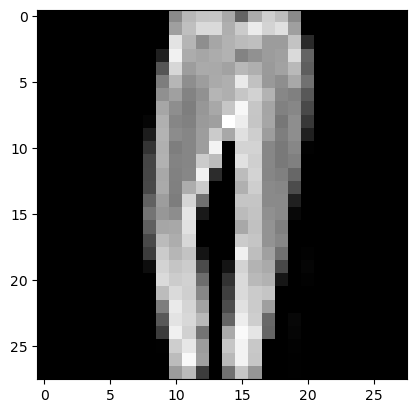

In [316]:
import matplotlib.pyplot as plt
image, label = next(iter(train_loader))
print(image.shape, label.shape)
plt.imshow(image[0][0], cmap="gray")

In [317]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.3),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(0.3))
        self.fc = nn.Sequential(
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 64*4*4)
        x = self.fc(x)
        return x

model = Net()
model = model.cuda()

In [318]:
# 设定损失函数
criterion = nn.CrossEntropyLoss()

In [319]:
?nn.CrossEntropyLoss

In [320]:
# 设定优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [321]:
def train(epoch):
    model.train()
    train_loss = 0
    for data, label in train_loader:
        data, label = data.cuda(), label.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0) # 求一个epoch的损失和
    train_loss = train_loss/len(train_loader.dataset) # 求epoch的平均损失
    print("Epoch:{}\tTraining Loss: {:.6f}".format(epoch, train_loss))

In [322]:
def val(epoch):
    model.eval()
    val_loss = 0
    gt_labels = []
    pred_labels = []
    with torch.no_grad():
        for data, label in test_loader:
            data, label = data.cuda(), label.cuda()
            output = model(data)
            preds = torch.argmax(output, 1)
            gt_labels.append(label.cpu().data.numpy())
            pred_labels.append(preds.cpu().data.numpy())
            loss = criterion(output, label)
            val_loss += loss.item()*data.size(0)
    val_loss = val_loss/len(test_loader.dataset)
    gt_labels, pred_labels = np.concatenate(gt_labels), np.concatenate(pred_labels)
    acc = np.sum(gt_labels == pred_labels) / len(pred_labels)
    print("epoch:{}\tValidation Loss: {:.6f}, Accuracy:{:.6f}".format(epoch, val_loss, acc))

In [324]:
for epoch in range(1, epochs + 1):
    train(epoch)
    val(epoch)

Epoch:1	Training Loss: 0.670686
epoch:1	Validation Loss: 0.455436, Accuracy:0.836600
Epoch:2	Training Loss: 0.421734
epoch:2	Validation Loss: 0.367584, Accuracy:0.869600
Epoch:3	Training Loss: 0.362921
epoch:3	Validation Loss: 0.330803, Accuracy:0.880000
Epoch:4	Training Loss: 0.326666
epoch:4	Validation Loss: 0.320874, Accuracy:0.880900
Epoch:5	Training Loss: 0.301207
epoch:5	Validation Loss: 0.295217, Accuracy:0.895100
Epoch:6	Training Loss: 0.285744
epoch:6	Validation Loss: 0.268054, Accuracy:0.902200
Epoch:7	Training Loss: 0.270659
epoch:7	Validation Loss: 0.269887, Accuracy:0.901500
Epoch:8	Training Loss: 0.257946
epoch:8	Validation Loss: 0.266417, Accuracy:0.902300
Epoch:9	Training Loss: 0.247674
epoch:9	Validation Loss: 0.247118, Accuracy:0.909100
Epoch:10	Training Loss: 0.239210
epoch:10	Validation Loss: 0.257759, Accuracy:0.905900
Epoch:11	Training Loss: 0.231137
epoch:11	Validation Loss: 0.244539, Accuracy:0.912500
Epoch:12	Training Loss: 0.221423
epoch:12	Validation Loss: 0.

In [325]:
# 模型保存
save_path = "./FashionMNIST/FashionModel.pkl"
torch.save(model, save_path)